# DBSCAN on datasets with different densities

In this tutorial, we compare the DBSCAN algorithm on datasets that have different densities.

We start from a standard "moon" datasets from the Scikit-Learn datasets.

In [1]:
from sklearn import datasets, cluster
from sklearn.preprocessing import StandardScaler

In [2]:
n_samples = 500
seed = 30

# We are not shuffling because we'd like to have the ability to adjust the density of some moons
dataset = datasets.make_moons(n_samples=n_samples, noise=0.05, random_state=seed, shuffle=False)

params = {
            "eps": 0.3,
         }

X, y = dataset


In [3]:
# normalize dataset for easier parameter selection
X = StandardScaler().fit_transform(X)

Let's run the DBSCAN algorithm and fit it to the data.

In [4]:
dbscan = cluster.DBSCAN(eps=params["eps"])
dbscan.fit(X)

DBSCAN(eps=0.3)

Let us assign the predictions (labels) to `y_pred`.

In [5]:
y_pred = dbscan.labels_.astype(int)

And let's plot the output of the DBSCAN prediction.

Text(0.5, 1.0, 'Clusters determined by DBSCAN')

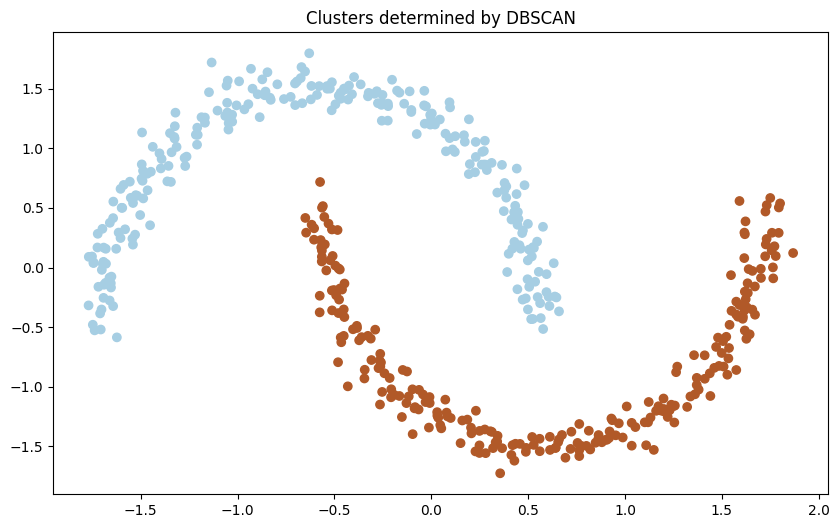

In [6]:
import matplotlib.pyplot as plt
%matplotlib inline

plt.figure(figsize=(10,6))
plt.scatter(X[:,0], X[:,1],c=y_pred, cmap='Paired')
plt.title("Clusters determined by DBSCAN")

Now let us look a bit closer to the 1st half of the dataset. To check that it indeed corresponds to the "1st moon".

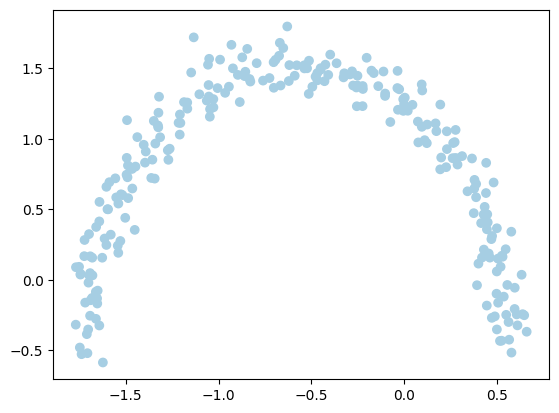

In [7]:
# Plotting the 1st "moon" (the `n_samples/2` first elements)
plt.scatter(X[:int(n_samples/2),0], X[:int(n_samples/2),1],c=y_pred[:int(n_samples/2)], cmap='Paired')

And let us plot the "2nd moon" but only taking 1 out of every 4 points (i.e. reducing the density).

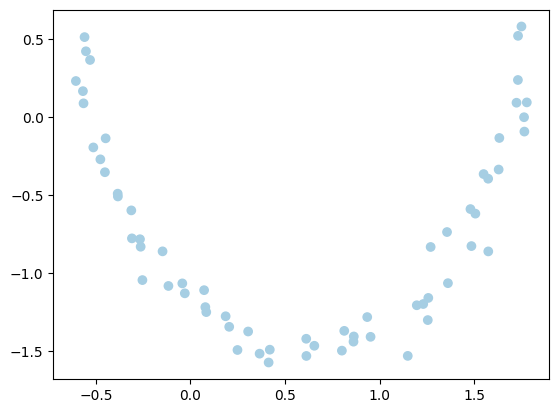

In [8]:
# Plotting the 2nd moon (2nd half of elements), but reducing the density by taking every 4th point
plt.scatter(X[int(n_samples/2)::4,0], X[int(n_samples/2)::4,1],c=y_pred[int(n_samples/2)::4], cmap='Paired')

We could confirm that the 1st moon is made of the 1st half of the data points, and the 2nd moon from the 2nd half. We now create a dataset combining the two, keeping only 1 out of every 4 points for the 2nd moon.

In [9]:
# Crafting a new dataset

import numpy as np
Xnew = np.concatenate((X[:int(n_samples/2),:], X[int(n_samples/2)::4,:]))
ynew = np.concatenate((y[:int(n_samples/2)], y[int(n_samples/2)::4]))

# Shuffling the array
perm = np.random.permutation(len(ynew))

Xnew = Xnew[perm,:]
ynew = ynew[perm]

Let us check that we have the desired output. First let's check that we properly randomised the "new" output. (We do this by checking that the first half of the points corresponds to the two moons.

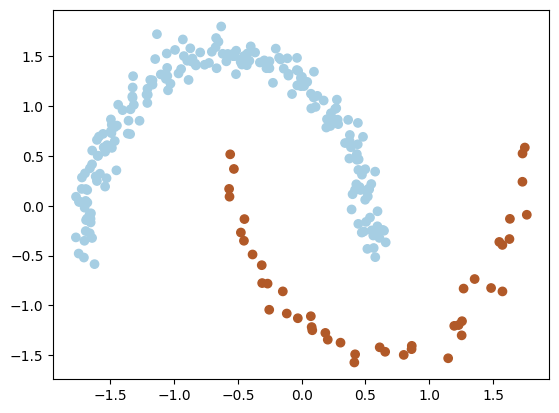

In [10]:
# Checking that we have the desired output
# First checking that the `n_samples/2` first elements have both moons (i.e. they have ben randomised)
plt.scatter(Xnew[:int(n_samples/2),0], Xnew[:int(n_samples/2),1],c=ynew[:int(n_samples/2)], cmap='Paired')

And we now plot the new dataset, showing that the densities are different.

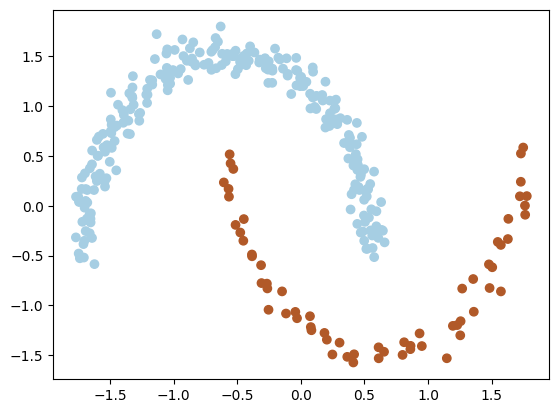

In [11]:
# Checking that the densities are different
plt.scatter(Xnew[:,0], Xnew[:,1],c=ynew[:], cmap='Paired')

Now that we have created our new dataset, i.e. two "moons" with different densities, we can see how the DBSCAN algorithm perfoms on each of them with the same value of eps.

In [12]:
def run_DBSCAN(X, eps, ax):
    dbscan = cluster.DBSCAN(eps)
    dbscan.fit(X)
    y_pred = dbscan.labels_.astype(int)
    
    ax.scatter(X[:,0], X[:,1],c=y_pred, cmap='Paired')
    ax.set_title(f"Clusters determined by DBSCAN with eps={eps}")

In [13]:
def comp_DBSCAN(eps):
    fig, ax = plt.subplots(1, 2, figsize=(16, 6))
    run_DBSCAN(X, eps, ax[0])
    run_DBSCAN(Xnew, eps, ax[1])


Let's have a look and see how the two datasets are processed by DBSCAN with different eps values.

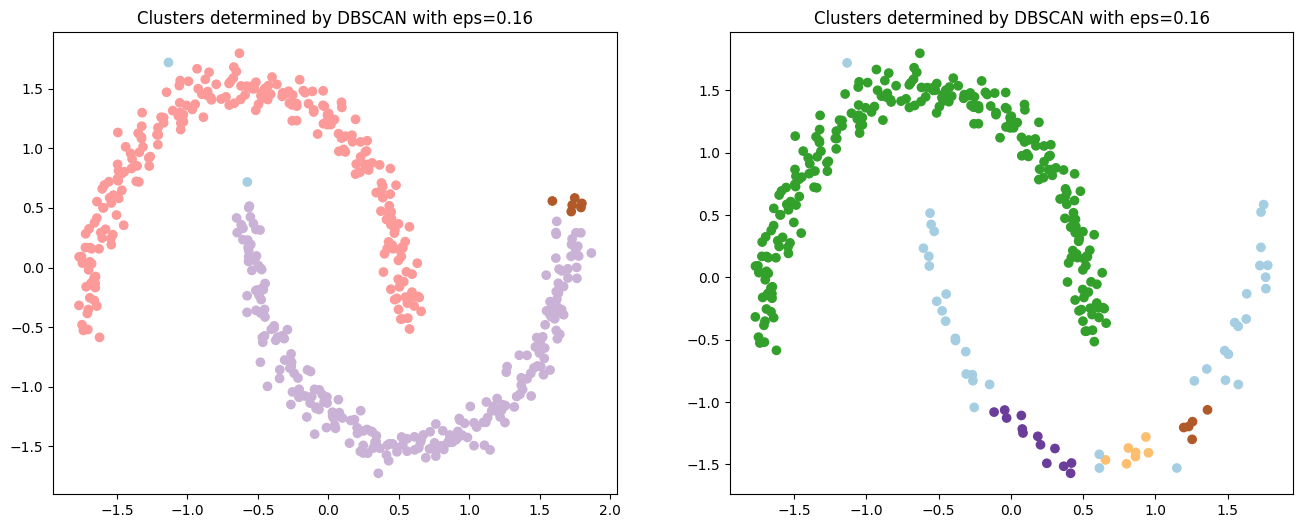

In [14]:
comp_DBSCAN(0.16)

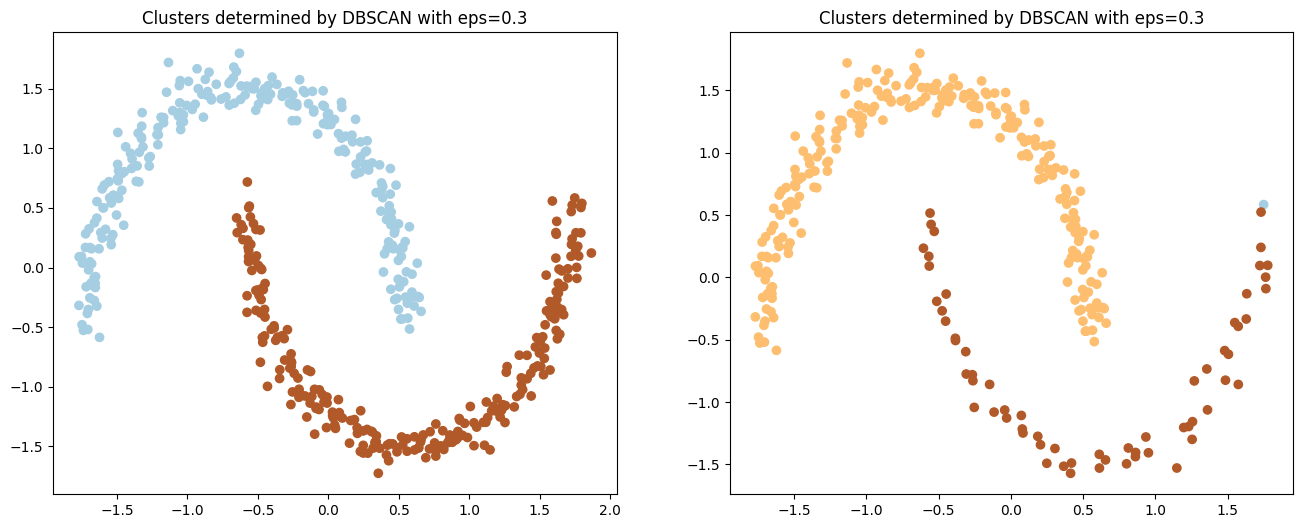

In [15]:
comp_DBSCAN(0.30)

We can see that the DBSCAN algorithm with eps = 0.16 doesn't do well in clustering the 2nd moon (it also has issues with the edge of the 1st), but that taking eps = 0.30 performs much better. A similar conclusion can be drawn by adjusting the minPts.